In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("50_Startups.csv")

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data= pd.get_dummies(data,drop_first=True)

In [6]:
data=data.astype(int)

In [7]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349,136897,471784,192261,0,1
1,162597,151377,443898,191792,0,0
2,153441,101145,407934,191050,1,0
3,144372,118671,383199,182901,0,1
4,142107,91391,366168,166187,1,0


In [8]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [9]:
independent=data[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]

In [10]:
independent.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349,136897,471784,0,1
1,162597,151377,443898,0,0
2,153441,101145,407934,1,0
3,144372,118671,383199,0,1
4,142107,91391,366168,1,0


In [11]:
dependent=data[['Profit']]

In [12]:
dependent.head()

,Profit
0,192261
1,191792
2,191050
3,182901
4,166187


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)


In [14]:
x_train,x_test,y_train,y_test

(    R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
 7      130298          145530           323876              1               0
 14     119943          156547           256512              1               0
 45       1000          124153             1903              0               1
 48        542           51743                0              0               1
 29      65605          153032           107138              0               1
 15     114523          122616           261776              0               1
 30      61994          115641            91131              1               0
 32      63408          129219            46085              0               0
 16      78013          121597           264346              0               0
 42      23640           96189           148001              0               0
 20      76253          113867           298664              0               0
 43      15505          127382            35534     

In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor=regressor.fit(x_train,y_train)

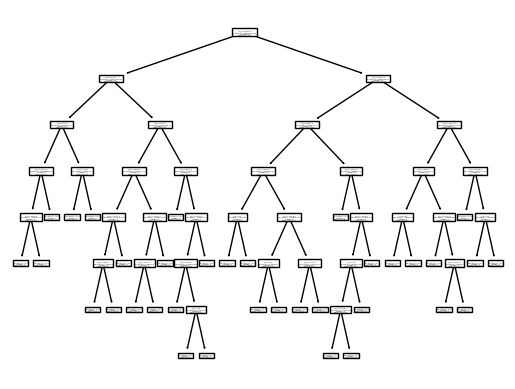

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [17]:
y_pred = regressor.predict(x_test)

In [18]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test,y_pred)

In [19]:
r_score

0.9136951352956211

In [20]:
import pickle

In [21]:
filename = "finalized_model_DecisionTree.sav"

In [22]:
pickle.dump(regressor,open(filename,'wb'))

In [23]:
loaded_model=pickle.load(open("finalized_model_DecisionTree.sav",'rb'))

In [24]:
result = loaded_model.predict([[4576,6745,8000,1,0]])

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [25]:
result

array([49490.])